In [73]:
# Imports
import pandas as pd
import numpy as np
#from keras.models import Sequential
#from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import KernelPCA



from sklearn.model_selection import KFold
#from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt

#from imblearn.over_sampling import SMOTE

In [74]:
# Uses "clean data" - no IQR Removal
filtered_data = pd.read_csv('clean_data.csv', index_col=0, parse_dates=['Create_date'])


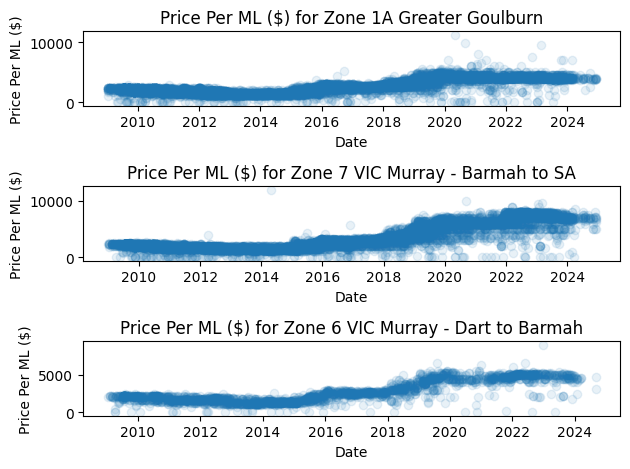

In [75]:
# Define the specific zones
specific_zones = ['1A Greater Goulburn', '7 VIC Murray - Barmah to SA', '6 VIC Murray - Dart to Barmah']

# Segregate data into the specified zones
zone_data_1A = filtered_data[filtered_data['Trading Zone Source'] == specific_zones[0]]
zone_data_7 = filtered_data[filtered_data['Trading Zone Source'] == specific_zones[1]]
zone_data_6 = filtered_data[filtered_data['Trading Zone Source'] == specific_zones[2]]

# Plot the data for each zone with 'Create_date' vs 'Price Per ML ($)'
fig, ax = plt.subplots(len(specific_zones))

for i, zone in enumerate(specific_zones):
    zone_data = filtered_data[filtered_data['Trading Zone Source'] == zone]
    ax[i].scatter(zone_data['Create_date'], zone_data['Price Per ML ($)'], alpha=0.1)
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Price Per ML ($)')
    ax[i].title.set_text(f"Price Per ML ($) for Zone {zone}")

fig.tight_layout()

<Figure size 1200x800 with 0 Axes>

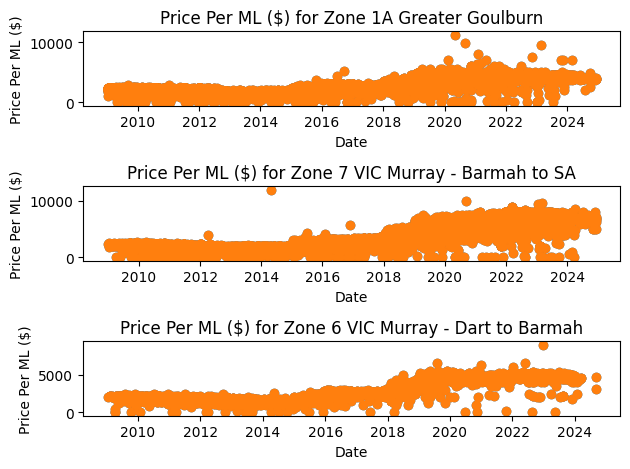

In [76]:

# Define the specific zones
specific_zones = ['1A Greater Goulburn', '7 VIC Murray - Barmah to SA', '6 VIC Murray - Dart to Barmah']

# Segregate data into the specified zones
zone_data_1A = filtered_data[filtered_data['Trading Zone Source'] == specific_zones[0]]
zone_data_7 = filtered_data[filtered_data['Trading Zone Source'] == specific_zones[1]]
zone_data_6 = filtered_data[filtered_data['Trading Zone Source'] == specific_zones[2]]

# Plot the data for each zone with 'Create_date' vs 'Price Per ML ($)'
plt.figure(figsize=(12, 8))

fig, ax = plt.subplots(len(specific_zones))

for i, zone in enumerate(specific_zones):
    zone_data = filtered_data[filtered_data['Trading Zone Source'] == zone]
    ax[i].scatter(zone_data['Create_date'], zone_data['Price Per ML ($)'])
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Price Per ML ($)')
    ax[i].title.set_text(f"Price Per ML ($) for Zone {zone}")
# Plot for Zone 1A Greater Goulburn
plt.subplot(3, 1, 1)
plt.scatter(zone_data_1A['Create_date'], zone_data_1A['Price Per ML ($)'])
plt.title("Price Per ML ($) for Zone 1A Greater Goulburn")
plt.xlabel('Date')
plt.ylabel('Price Per ML ($)')

# Plot for Zone 7 VIC Murray - Barmah to SA
plt.subplot(3, 1, 2)
plt.scatter(zone_data_7['Create_date'], zone_data_7['Price Per ML ($)'])
plt.title("Price Per ML ($) for Zone 7 VIC Murray - Barmah to SA")
plt.xlabel('Date')
plt.ylabel('Price Per ML ($)')

# Plot for Zone 6 VIC Murray - Dart to Barmah
plt.subplot(3, 1, 3)
plt.scatter(zone_data_6['Create_date'], zone_data_6['Price Per ML ($)'])
plt.title("Price Per ML ($) for Zone 6 VIC Murray - Dart to Barmah")
plt.xlabel('Date')
plt.ylabel('Price Per ML ($)')

plt.tight_layout()
plt.show()

In [77]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Ensure that modifications to 'zone_data_1A' do not raise SettingWithCopyWarning
zone_data_1A = zone_data_1A.copy()

# Convert 'Create_date' from datetime to a numerical format for model training
zone_data_1A['Create_date_ordinal'] = zone_data_1A['Create_date'].apply(lambda x: x.toordinal())

# Ensure that modifications to 'zone_data_7' do not raise SettingWithCopyWarning
zone_data_7 = zone_data_7.copy()

# Convert 'Create_date' from datetime to a numerical format for model training
zone_data_7['Create_date_ordinal'] = zone_data_7['Create_date'].apply(lambda x: x.toordinal())

# Ensure that modifications to 'zone_data_6' do not raise SettingWithCopyWarning
zone_data_6 = zone_data_6.copy()

# Convert 'Create_date' from datetime to a numerical format for model training
zone_data_6['Create_date_ordinal'] = zone_data_6['Create_date'].apply(lambda x: x.toordinal())


print(zone_data_1A)

# Prepare the feature matrix 'X' and target vector 'y'
#X = zone_data_1A[['Create_date_ordinal', 'Price Per ML ($)']]



         Status Application Creation Date Approved / Refused Date  \
0      Recorded                2013-12-07              24/07/2013   
3      Recorded                2018-04-13              26/04/2018   
27     Recorded                2011-02-09              05/09/2011   
33     Recorded                2017-06-21              26/06/2017   
35     Recorded                2017-06-19              23/06/2017   
...         ...                       ...                     ...   
47597  Recorded                2023-08-28              06/09/2023   
47598  Recorded                2012-12-21              24/12/2012   
47605  Recorded                2020-01-09              08/09/2020   
47613  Recorded                2020-01-15              17/02/2020   
47620  Recorded                2020-10-12              12/01/2021   

      Recorded / Rejected Date Water Share ID Water System Source Reliability  \
0                   23/08/2013      WEE****24            Goulburn        High   
3        

In [78]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

def perform_DBSCAN(zone_data, name, ax=None):
    # Prepare the feature matrix 'X' for clustering
    X = zone_data[['Create_date_ordinal', 'Price Per ML ($)']]

    # Create a dbscan object with 2 clusters
    dbscan = DBSCAN(eps=400, min_samples=100)

    # Fit the model to the data
    dbscan.fit(X)

    # Get the cluster labels for each data point
    labels = dbscan.labels_

    # Add the cluster labels to the DataFrame
    zone_data['Cluster'] = labels


    
    # Colors for the clusters, using a set to find unique labels for unique colors
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    if ax is None:
        fig, ax =plt.subplots()

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        ax.scatter(zone_data[class_member_mask]['Create_date'], X[class_member_mask]['Price Per ML ($)'], color=col, label=f'Cluster {k}')

    ax.set_xlabel('Date')
    ax.set_ylabel('Price Per ML ($)')
    ax.title.set_text(f'DBSCAN Clustering on Zone {name}')
    ax.legend()

    return zone_data




In [79]:
zone.split()[0]

'6'

clean_data

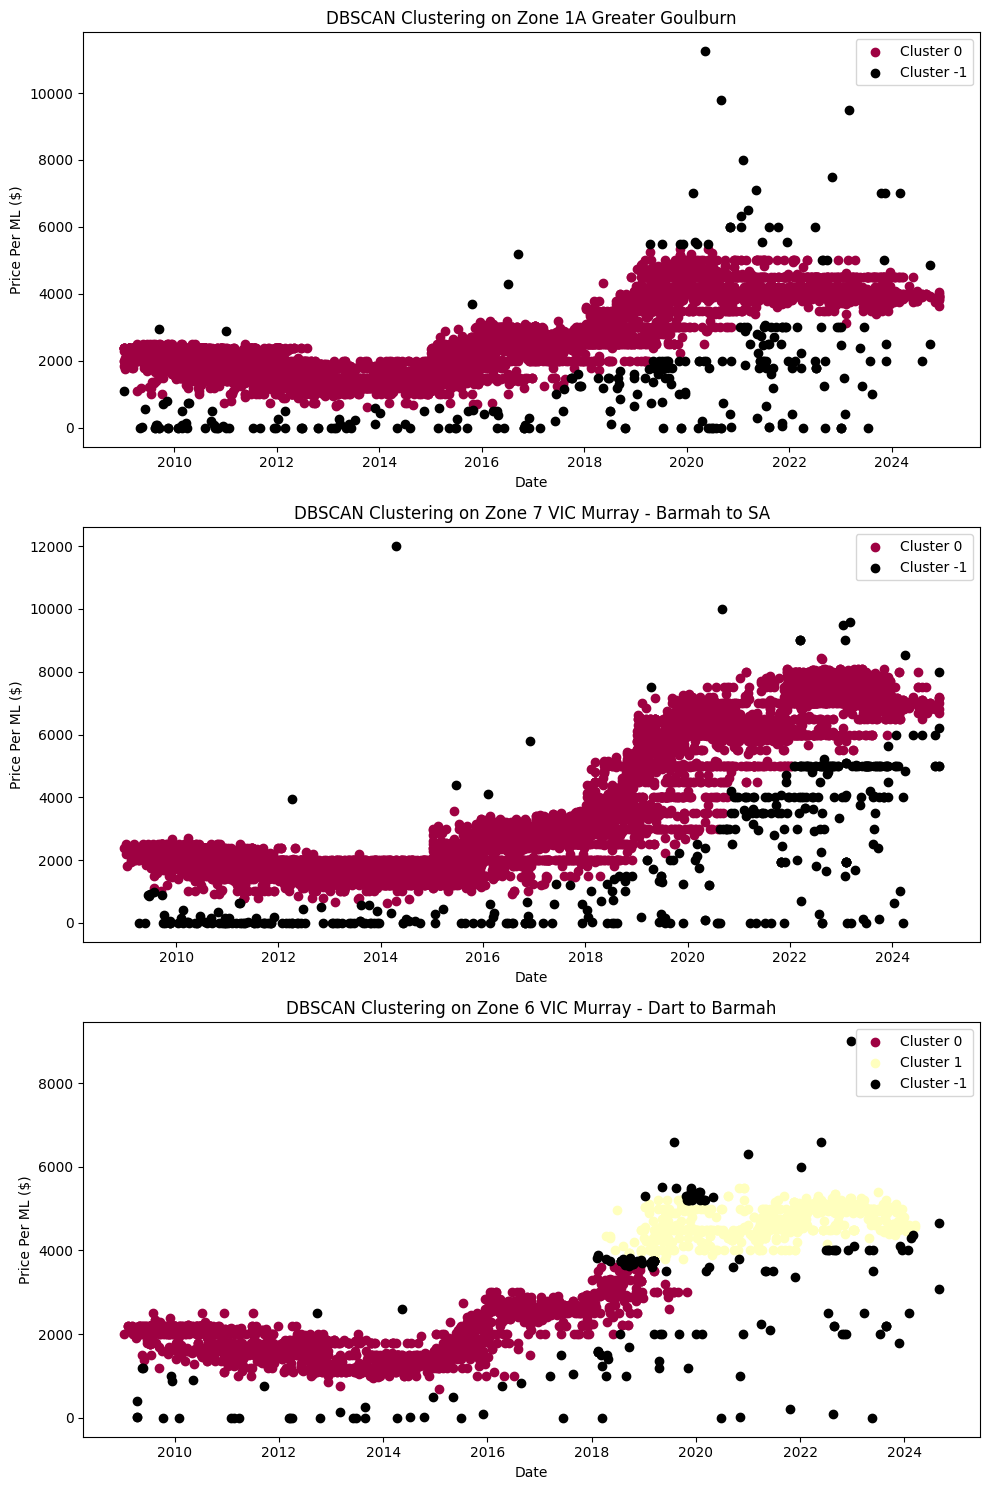

In [80]:
filtered_data['Create_date_ordinal'] = filtered_data['Create_date'].apply(lambda x: x.toordinal())

fig, ax = plt.subplots(len(specific_zones), figsize=(10, 5*len(specific_zones)))

for i, zone in enumerate(specific_zones):
    zone_data = filtered_data[filtered_data['Trading Zone Source'] == zone]
    perform_DBSCAN(zone_data.copy(), zone, ax=ax[i]).to_csv(f'zone_data_{zone.split()[0]}_clustered.csv', index=False)# Export the clustered data for each zone to CSV files
fig.tight_layout()

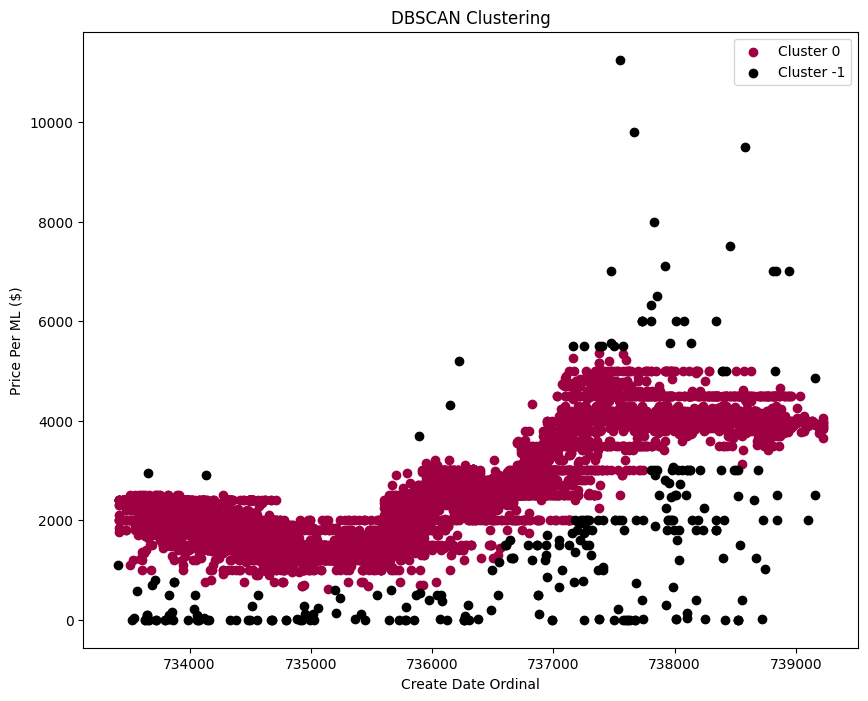

         Status Application Creation Date Approved / Refused Date  \
0      Recorded                2013-12-07              24/07/2013   
3      Recorded                2018-04-13              26/04/2018   
27     Recorded                2011-02-09              05/09/2011   
33     Recorded                2017-06-21              26/06/2017   
35     Recorded                2017-06-19              23/06/2017   
...         ...                       ...                     ...   
47597  Recorded                2023-08-28              06/09/2023   
47598  Recorded                2012-12-21              24/12/2012   
47605  Recorded                2020-01-09              08/09/2020   
47613  Recorded                2020-01-15              17/02/2020   
47620  Recorded                2020-10-12              12/01/2021   

      Recorded / Rejected Date Water Share ID Water System Source Reliability  \
0                   23/08/2013      WEE****24            Goulburn        High   
3        

In [81]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


# Prepare the feature matrix 'X' for clustering
X = zone_data_1A[['Create_date_ordinal', 'Price Per ML ($)']]

# Create a dbscan object with 2 clusters
dbscan = DBSCAN(eps=400, min_samples=100)

# Fit the model to the data
dbscan.fit(X)

# Get the cluster labels for each data point
labels = dbscan.labels_

# Add the cluster labels to the DataFrame
zone_data_1A['Cluster'] = labels


plt.figure(figsize=(10, 8))
# Colors for the clusters, using a set to find unique labels for unique colors
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    plt.scatter(X[class_member_mask]['Create_date_ordinal'], X[class_member_mask]['Price Per ML ($)'], color=col, label=f'Cluster {k}')

plt.xlabel('Create Date Ordinal')
plt.ylabel('Price Per ML ($)')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()


print(zone_data_1A)



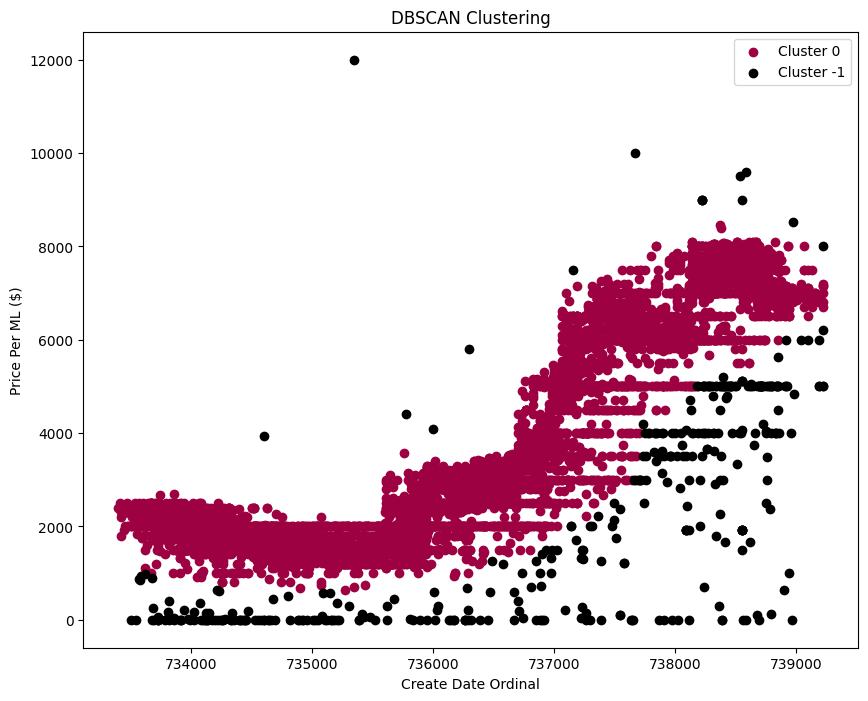

In [82]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


# Prepare the feature matrix 'X' for clustering
X = zone_data_7[['Create_date_ordinal', 'Price Per ML ($)']]

# Create a dbscan object with 2 clusters
dbscan = DBSCAN(eps=400, min_samples=100)

# Fit the model to the data
dbscan.fit(X)

# Get the cluster labels for each data point
labels = dbscan.labels_

# Add the cluster labels to the DataFrame
zone_data_7['Cluster'] = labels


plt.figure(figsize=(10, 8))
# Colors for the clusters, using a set to find unique labels for unique colors
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    plt.scatter(X[class_member_mask]['Create_date_ordinal'], X[class_member_mask]['Price Per ML ($)'], color=col, label=f'Cluster {k}')

plt.xlabel('Create Date Ordinal')
plt.ylabel('Price Per ML ($)')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

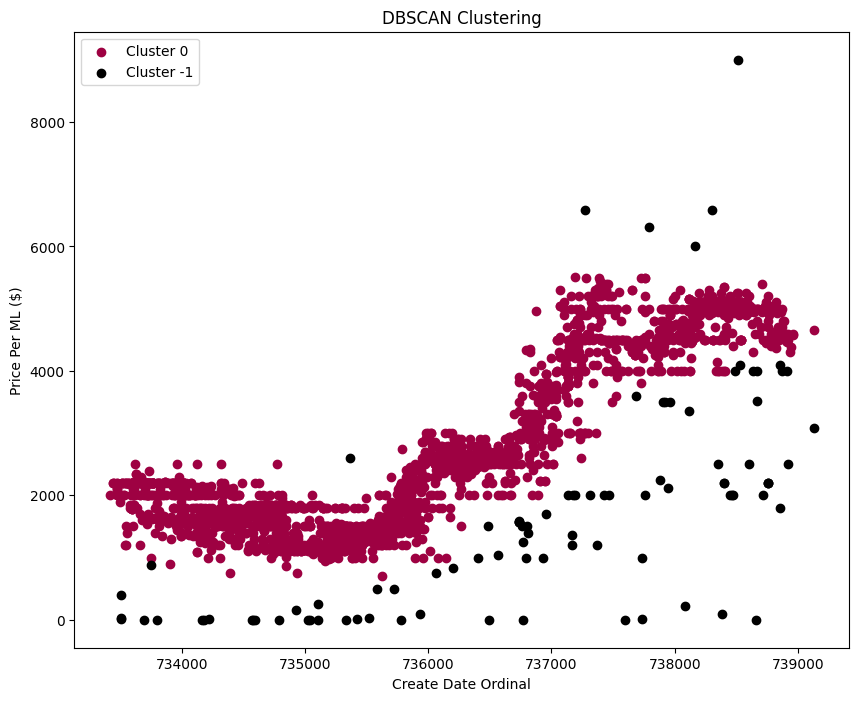

In [83]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


# Prepare the feature matrix 'X' for clustering
X = zone_data_6[['Create_date_ordinal', 'Price Per ML ($)']]

# Create a dbscan object with 2 clusters
dbscan = DBSCAN(eps=400, min_samples=60)

# Fit the model to the data
dbscan.fit(X)

# Get the cluster labels for each data point
labels = dbscan.labels_

# Add the cluster labels to the DataFrame
zone_data_6['Cluster'] = labels


plt.figure(figsize=(10, 8))
# Colors for the clusters, using a set to find unique labels for unique colors
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    plt.scatter(X[class_member_mask]['Create_date_ordinal'], X[class_member_mask]['Price Per ML ($)'], color=col, label=f'Cluster {k}')

plt.xlabel('Create Date Ordinal')
plt.ylabel('Price Per ML ($)')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

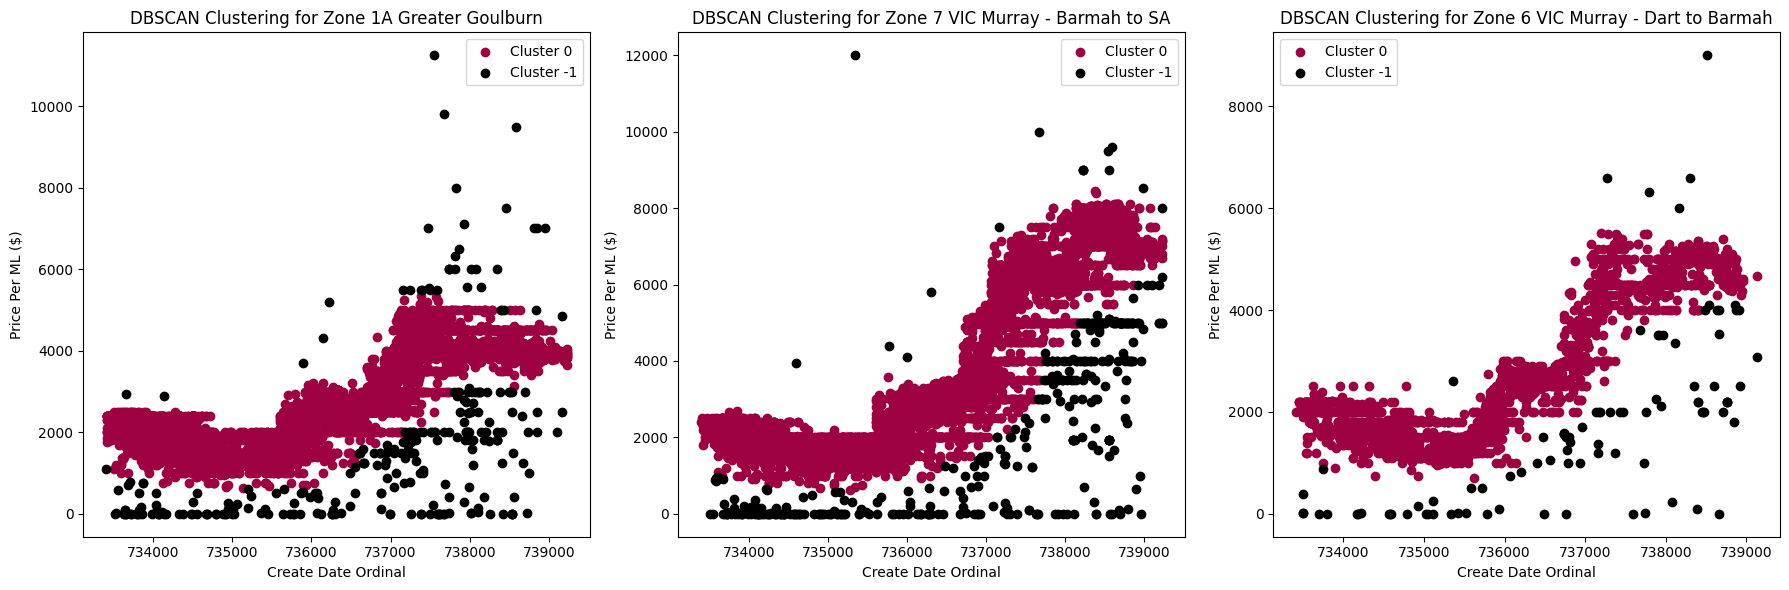

In [84]:
# Prepare the figure layout
plt.figure(figsize=(18, 6))  # Adjusted figure size for better aspect ratio

# Plot for Zone 1A Greater Goulburn
plt.subplot(1, 3, 1)
unique_labels_1A = set(zone_data_1A['Cluster'])
colors_1A = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_1A))]
for k, col in zip(unique_labels_1A, colors_1A):
    if k == -1:
        col = 'k'  # Black used for noise.
    class_member_mask = (zone_data_1A['Cluster'] == k)
    plt.scatter(zone_data_1A[class_member_mask]['Create_date_ordinal'], zone_data_1A[class_member_mask]['Price Per ML ($)'], color=col, label=f'Cluster {k}')
plt.title("DBSCAN Clustering for Zone 1A Greater Goulburn")
plt.xlabel('Create Date Ordinal')
plt.ylabel('Price Per ML ($)')
plt.legend()

# Plot for Zone 7 VIC Murray - Barmah to SA
plt.subplot(1, 3, 2)
unique_labels_7 = set(zone_data_7['Cluster'])
colors_7 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_7))]
for k, col in zip(unique_labels_7, colors_7):
    if k == -1:
        col = 'k'  # Black used for noise.
    class_member_mask = (zone_data_7['Cluster'] == k)
    plt.scatter(zone_data_7[class_member_mask]['Create_date_ordinal'], zone_data_7[class_member_mask]['Price Per ML ($)'], color=col, label=f'Cluster {k}')
plt.title("DBSCAN Clustering for Zone 7 VIC Murray - Barmah to SA")
plt.xlabel('Create Date Ordinal')
plt.ylabel('Price Per ML ($)')
plt.legend()

# Plot for Zone 6 VIC Murray - Dart to Barmah
plt.subplot(1, 3, 3)
unique_labels_6 = set(zone_data_6['Cluster'])
colors_6 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_6))]
for k, col in zip(unique_labels_6, colors_6):
    if k == -1:
        col = 'k'  # Black used for noise.
    class_member_mask = (zone_data_6['Cluster'] == k)
    plt.scatter(zone_data_6[class_member_mask]['Create_date_ordinal'], zone_data_6[class_member_mask]['Price Per ML ($)'], color=col, label=f'Cluster {k}')
plt.title("DBSCAN Clustering for Zone 6 VIC Murray - Dart to Barmah")
plt.xlabel('Create Date Ordinal')
plt.ylabel('Price Per ML ($)')
plt.legend()

plt.tight_layout()
plt.show()

In [85]:
# Export the clustered data for each zone to CSV files
zone_data_1A.to_csv('zone_data_1A_clustered.csv', index=False)
zone_data_7.to_csv('zone_data_7_clustered.csv', index=False)
zone_data_6.to_csv('zone_data_6_clustered.csv', index=False)
